<a href="https://colab.research.google.com/github/scatdelight/AI/blob/main/%08house_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/Machinelearning/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Machinelearning/test.csv")

train.shape, test.shape # 1460 x 81, 1459 x 80

((1460, 81), (1459, 80))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
print('train.info is {}, test.info is {}'.format(train.shape, test.shape))

train.info is (1460, 81), test.info is (1459, 80)


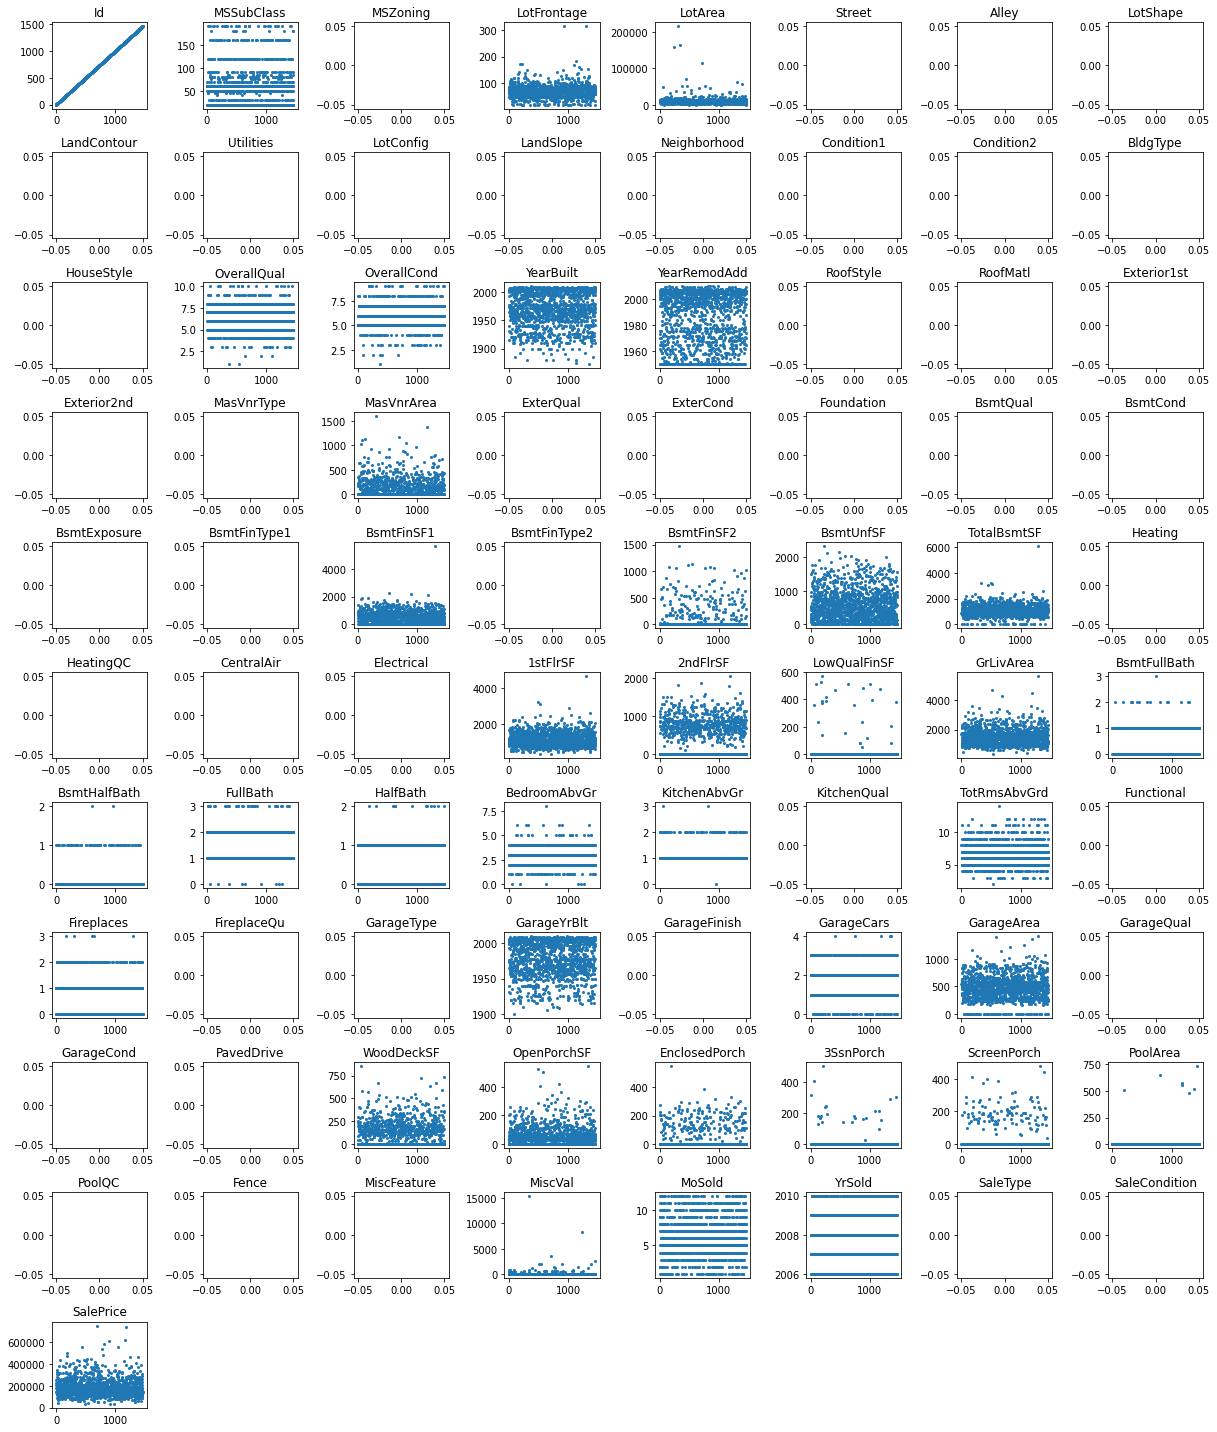

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (17, 20))
count = 1
for feature in train.columns:
    if(train[feature].dtypes != object):
        axes = fig.add_subplot(11, 8, count)
        axes.plot(train['Id'], train[feature], 'o', markersize = 2)
        axes.set_title(feature)
        count += 1
    else:
        axes = fig.add_subplot(11, 8, count)
        axes.plot()
        axes.set_title(feature)
        count += 1

fig.tight_layout()
fig.show()

# Data preprocessing

1. Null data
2. object data
3. outlier
4. normalization

## 1. Null data

In [ ]:
for feature in train.columns:
    if(train[feature].isnull().sum() != 0):
        print(feature, train[feature].isnull().sum(), train[feature].dtypes)

print('\n\n--------------------\n\n')


for feature in test.columns:
    if(test[feature].isnull().sum() != 0):
        print(feature, test[feature].isnull().sum(), test[feature].dtypes)

LotFrontage 259 float64
Alley 1369 object
MasVnrType 8 object
MasVnrArea 8 float64
BsmtQual 37 object
BsmtCond 37 object
BsmtExposure 38 object
BsmtFinType1 37 object
BsmtFinType2 38 object
Electrical 1 object
FireplaceQu 690 object
GarageType 81 object
GarageYrBlt 81 float64
GarageFinish 81 object
GarageQual 81 object
GarageCond 81 object
PoolQC 1453 object
Fence 1179 object
MiscFeature 1406 object


--------------------


MSZoning 4 object
LotFrontage 227 float64
Alley 1352 object
Utilities 2 object
Exterior1st 1 object
Exterior2nd 1 object
MasVnrType 16 object
MasVnrArea 15 float64
BsmtQual 44 object
BsmtCond 45 object
BsmtExposure 44 object
BsmtFinType1 42 object
BsmtFinSF1 1 float64
BsmtFinType2 42 object
BsmtFinSF2 1 float64
BsmtUnfSF 1 float64
TotalBsmtSF 1 float64
BsmtFullBath 2 float64
BsmtHalfBath 2 float64
KitchenQual 1 object
Functional 2 object
FireplaceQu 730 object
GarageType 76 object
GarageYrBlt 78 float64
GarageFinish 78 object
GarageCars 1 float64
GarageArea 1 float6

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


Text(0.5, 1.0, 'Percent missing data by feature')

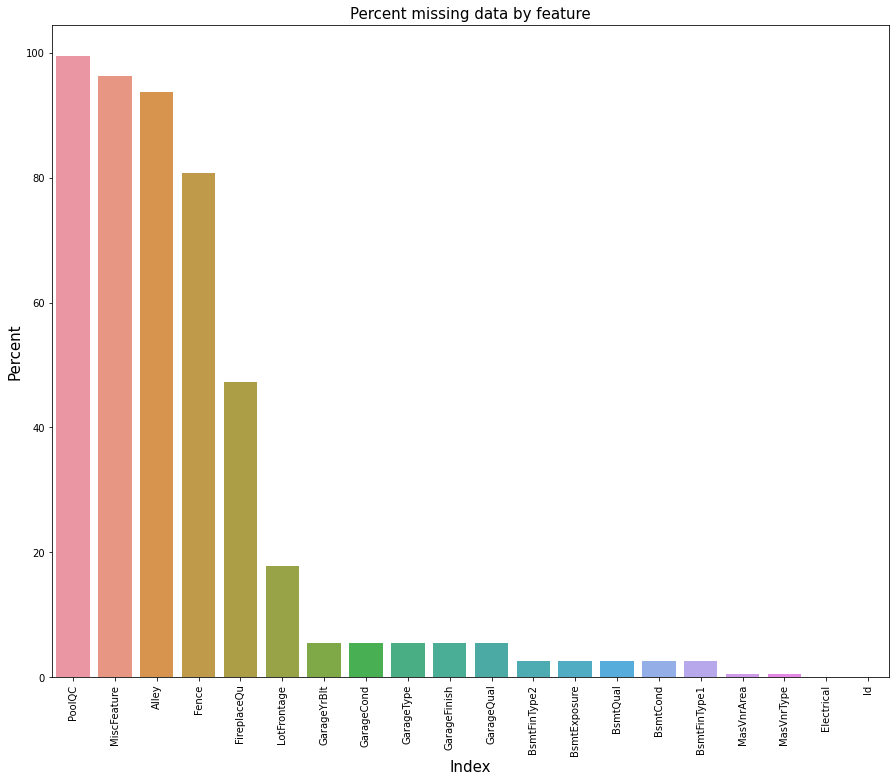

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x = missing_data.index[:20], y = missing_data['Percent'][:20])
plt.xlabel('Index', fontsize=15)
plt.ylabel('Percent', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [ ]:
# train = train.drop(missing_data[missing_data['Percent']>=0.8].index, 1)
# train=train.drop('Fence', 1)

count_object = 0
count_not_object = 0
for feature in train.columns:
    if(train[feature].isnull().sum() != 0 and train[feature].dtype == 'object'):
        count_object += 1
        print(feature, train[feature].isnull().sum(), train[feature].dtype)

print('\n----------------------\n')

for feature in train.columns:
    if(train[feature].isnull().sum() != 0 and train[feature].dtype != 'object'):
        count_not_object += 1
        print(feature, train[feature].isnull().sum(), train[feature].dtype)

print('\ncount_object = {}, count_not_object = {}'.format(count_object, count_not_object))

Alley 1369 object
MasVnrType 8 object
BsmtQual 37 object
BsmtCond 37 object
BsmtExposure 38 object
BsmtFinType1 37 object
BsmtFinType2 38 object
Electrical 1 object
FireplaceQu 690 object
GarageType 81 object
GarageFinish 81 object
GarageQual 81 object
GarageCond 81 object
PoolQC 1453 object
Fence 1179 object
MiscFeature 1406 object

----------------------

LotFrontage 259 float64
MasVnrArea 8 float64
GarageYrBlt 81 float64

count_object = 16, count_not_object = 3


In [ ]:
def handle_missing(features):
    features['Electrical'] = features['Electrical'].fillna("SBrkr")

    for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        features[col] = features[col].fillna('None')

    features['GarageYrBlt'] = features['GarageYrBlt'].fillna(0)

    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        features[col] = features[col].fillna('None')

    features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

    objects = []

    for i in features.columns:
        if features[i].dtype == object:
            objects.append(i)
    features.update(features[objects].fillna('None'))
        
    # And we do the same thing for numerical features, but this time with 0s
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for i in features.columns:
        if features[i].dtype in numeric_dtypes:
            numeric.append(i)
    features.update(features[numeric].fillna(0))    
    return features

handle_missing(train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125


In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
Id,0,0.0
CentralAir,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0


2. Object data

In [ ]:
for col in ('MSSubClass', 'OverallCond', 'YrSold', 'MoSold'):
    train[col] = train[col].astype(str)

In [ ]:
for col in ('MSSubClass', 'OverallCond', 'YrSold', 'MoSold'):
    print(train[col].dtypes)

object
object
object
object


In [ ]:
object_group = []

for feature in train.columns:
    if(train[feature].dtypes == 'object'):
        object_group.append(feature)

object_group

print(len(object_group))

       

47


In [ ]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

check = []

for feature in object_group:
    if(feature in cols):
        pass
    else:
        check.append(feature)

check

['MSZoning',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'GarageType',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
train['Electrical'].dtypes

dtype('O')

In [ ]:
train['Electrical'].values

array(['SBrkr', 'SBrkr', 'SBrkr', ..., 'SBrkr', 'FuseA', 'SBrkr'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

for member in object_group:
    lbl = LabelEncoder()
    lbl.fit(list(train[member].values))
    train[member] = lbl.transform(list(train[member].values))

train['Electrical'].values

array([4, 4, 4, ..., 4, 0, 4])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

3. Outliers

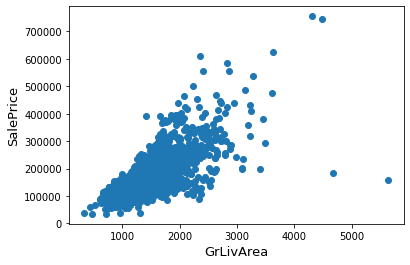

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


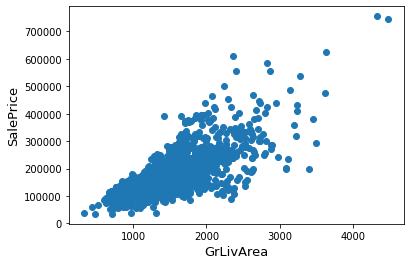

In [ ]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

features = train.loc[:, train.columns!="SalePrice"].to_numpy()

labels = train.loc[:, "SalePrice"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 11)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1093, 80)
(365, 80)
(1093,)
(365,)


# Model Train

In [ ]:
data_check = []
column = []
no = ['SalePrice', 'Id']
for col in train.columns:
    if(col not in no):
        data_check.append(train[col].values)
        column.append(col)

data_check

[array([ 9,  4,  9, ..., 10,  4,  4]),
 array([3, 3, 3, ..., 3, 3, 3]),
 array([65., 80., 68., ..., 66., 68., 75.]),
 array([ 8450,  9600, 11250, ...,  9042,  9717,  9937]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([3, 3, 0, ..., 3, 3, 3]),
 array([3, 3, 3, ..., 3, 3, 3]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([4, 2, 4, ..., 4, 4, 4]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([ 5, 24,  5, ...,  6, 12,  7]),
 array([2, 1, 2, ..., 2, 2, 2]),
 array([2, 2, 2, ..., 2, 2, 2]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([5, 2, 5, ..., 5, 2, 2]),
 array([7, 6, 7, ..., 7, 5, 5]),
 array([4, 7, 4, ..., 8, 5, 5]),
 array([2003, 1976, 2001, ..., 1941, 1950, 1965]),
 array([2003, 1976, 2002, ..., 2006, 1996, 1965]),
 array([1, 1, 1, ..., 1, 3, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([12,  8, 12, ...,  5,  8,  6]),
 array([13,  8, 13, ...,  5,  8,  6]),
 array([1, 2, 1, ..., 2, 2, 2]),
 array([196.,   0., 162., ...,   0.,   0.,   0.]),
 array([2, 3, 2, ..., 0, 3, 

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"

print('Using {} device'.format(device))


Using cuda device


In [ ]:
count = 1

data = []
no = ['SalePrice', 'Id']

for col in train.columns:
    if(col not in no):
      data.append(torch.from_numpy(train[col].values).unsqueeze(1).float())

x = torch.stack(data, dim = 1).squeeze().cuda()

y = torch.from_numpy(train['SalePrice'].values).unsqueeze(1).float().cuda()
#x = torch.stack(data, dim=1).squeeze()

time : 15.710993766784668


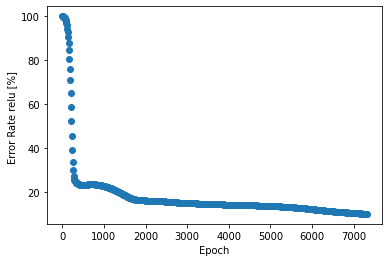

In [ ]:
import time

start = time.time()

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_hidden3, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)
        self.hidden3 = torch.nn.Linear(n_hidden2, n_hidden3)
        self.predict = torch.nn.Linear(n_hidden3, n_output)

    def forward(self, x): # 체크 필요
        a = F.relu(self.hidden1(x))
        b = F.relu(self.hidden2(a))
        c = F.relu(self.hidden3(b))
        e = self.predict(c)
        return e


model = Net(n_feature = len(data), n_hidden1 = 150, n_hidden2 = 150, n_hidden3 = 150, n_output = 1).to(device)


optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
loss_func = torch.nn.MSELoss()


Epoch = []
Error_Test = []
Target_ER = 10
t = 0

while(1):
    prediction = model(x)
    loss = loss_func(prediction, y)
    accuracy = 100 * abs(1 - prediction.cpu().data.numpy() / y.cpu().data.numpy())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    mean = np.mean(accuracy)

    if t % 10 == 0:
        Epoch.append(t)
        Error_Test.append(mean)

    t += 1

    if mean < Target_ER:
        break

fig, ax = plt.subplots()
ax.scatter(x = Epoch, y = Error_Test)
plt.xlabel('Epoch')
plt.ylabel('Error Rate relu [%] ')

print("time : {}".format(time.time() - start))

# #gpu time : 12.798748254776001
# #cpu time : 58.09084439277649



In [ ]:
Error_Test[-1]

10.021848

In [ ]:
result = prediction.cpu().detach().numpy()
result = result.squeeze().tolist()

result

list

In [ ]:
answer = y.cpu().data.numpy().tolist()
answer

[[208500.0],
 [181500.0],
 [223500.0],
 [140000.0],
 [250000.0],
 [143000.0],
 [307000.0],
 [200000.0],
 [129900.0],
 [118000.0],
 [129500.0],
 [345000.0],
 [144000.0],
 [279500.0],
 [157000.0],
 [132000.0],
 [149000.0],
 [90000.0],
 [159000.0],
 [139000.0],
 [325300.0],
 [139400.0],
 [230000.0],
 [129900.0],
 [154000.0],
 [256300.0],
 [134800.0],
 [306000.0],
 [207500.0],
 [68500.0],
 [40000.0],
 [149350.0],
 [179900.0],
 [165500.0],
 [277500.0],
 [309000.0],
 [145000.0],
 [153000.0],
 [109000.0],
 [82000.0],
 [160000.0],
 [170000.0],
 [144000.0],
 [130250.0],
 [141000.0],
 [319900.0],
 [239686.0],
 [249700.0],
 [113000.0],
 [127000.0],
 [177000.0],
 [114500.0],
 [110000.0],
 [385000.0],
 [130000.0],
 [180500.0],
 [172500.0],
 [196500.0],
 [438780.0],
 [124900.0],
 [158000.0],
 [101000.0],
 [202500.0],
 [140000.0],
 [219500.0],
 [317000.0],
 [180000.0],
 [226000.0],
 [80000.0],
 [225000.0],
 [244000.0],
 [129500.0],
 [185000.0],
 [144900.0],
 [107400.0],
 [91000.0],
 [135750.0],
 [127

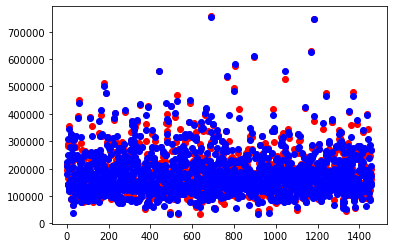

In [ ]:
fig, ax = plt.subplots()

index = []
for i in range(1, len(result)+1):
    index.append(i)

ax.scatter(x = index, y = result, color = 'r')
ax.scatter(x = index, y = answer, color = 'b')

In [ ]:
answer = pd.DataFrame(answer)
result = pd.DataFrame(result)

diff = abs((answer-result)/result*100)

diff

,0
0,0.932786
1,7.101653
2,2.829974
3,16.502576
4,11.360975
...,...
1453,3.332700
1454,4.779562
1455,0.491707
1456,0.472722


In [ ]:
diff.describe()

,0
count,1458.000000
mean,6.073710
std,6.264353
min,0.003972
25%,1.804589
50%,4.605482
75%,8.307692
max,69.532195
